Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

# Defining the question

Figure out how we can predict which individuals are most likely to have or use a bank account.

# Defining Metrics for success

The following will help improve metrics for success for our case study:

 1. Identify the age group with the most bank accounts.
 2. Identify household size with the most bank accounts.
 3. Identify which gender has the most number of bank accounts in different countries.
 4. Identify which country has the most number of bank accounts as compared to those with the least.
 5. Corelate individual countries to Levels of education.
 6. Corelate Levels of Education corelate with people who have bank accounts.
 7. Corelate Access to Cell Phones with people who have bank accounts.

# Understanding the context

# Experimental Design

# Appropriateness of the available data

The data provided describes the demographic factors of individuals who have bank accounts as well as those who do not have bank accounts. The data is relevant for this analysis

# Reading the data

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Loading data
Financial_data = pd.read_csv("Financial Dataset - 1.csv")

# Checking Our Data

In [11]:
# Number of rows and columns
Financial_data.shape

(8432, 13)

In [8]:
# Previewing top 5 rows
Financial_data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
# Previewing last 5 rows
Financial_data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
8427,Rwanda,2016,uniqueid_2360,No,Rural,Yes,3,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Farming and Fishing
8428,Rwanda,2016,uniqueid_2361,No,Rural,Yes,2,61.0,Female,Head of Household,Widowed,Primary education,Farming and Fishing
8429,Rwanda,2016,uniqueid_2362,No,Rural,Yes,5,60.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing
8430,Rwanda,2016,uniqueid_2363,No,Rural,Yes,4,16.0,Male,Parent,Single/Never Married,Secondary education,Informally employed
8431,Rwanda,2016,uniqueid_2364,No,Rural,Yes,4,30.0,Male,Head of Household,Married/Liv,NaN,NaN


In [10]:
# Checking for appropriate data type
print(Financial_data.describe())

print(Financial_data.info())

              year  household_size  Respondent Age
count  8432.000000     8432.000000     8425.000000
mean   2017.447818        4.132946       39.357864
std       1.026689        2.248419       16.893787
min    2016.000000        1.000000       16.000000
25%    2016.000000        2.000000       26.000000
50%    2018.000000        4.000000       35.000000
75%    2018.000000        6.000000       50.000000
max    2056.000000       21.000000       98.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8432 entries, 0 to 8431
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 8432 non-null   object 
 1   year                    8432 non-null   int64  
 2   uniqueid                8432 non-null   object 
 3   Has a Bank account      8432 non-null   object 
 4   Type of Location        8432 non-null   object 
 5   Cell Phone Access       8432 non-null   object 
 6   house

Observations:

The dataset has 23524 rows/data points with 13 columns/features.

The minimum respondent age is 16, maximum respondent age is 100.

Mean with an average of 35, deviation is of 16.

75% of homes have less than 5 households with bank accounts, and 25% have less than 2 households with a bank account.


In [12]:
#"Has a Bank account" is a target column where I want to see 2 values 
#    No(means Doesn't have a Bank account) 
#        and Yes(Has a Bank account).

Financial_data["Has a Bank account"].value_counts()

No     6633
Yes    1799
Name: Has a Bank account, dtype: int64

In the entire dataset we have 20179 rows(people) with value  No(means Doesn't have a Bank account) and 3309 rows(people) with value Yes(Has a Bank account).

# Cleaning our data

In [31]:
# Finding Outliers
import seaborn as sns
Financial_data['year'].unique()

array([2018, 2029, 2056, 2016, 2039])

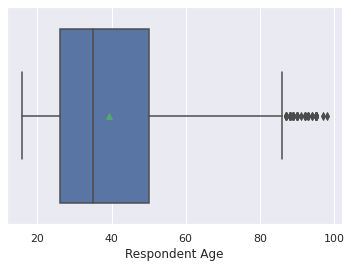

In [32]:
# Respondent age
sns.boxplot(Financial_data["Respondent Age"], showmeans=True)

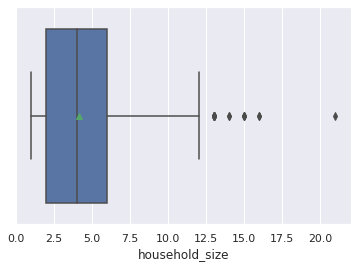

In [34]:
# Household_size
sns.boxplot(Financial_data["household_size"], showmeans=True)

In [30]:
# Finding Anomalies
print(Financial_data.nunique())

country                      2
year                         5
uniqueid                  6068
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              17
Respondent Age              82
gender_of_respondent         2
The relathip with head       6
marital_status               6
Level of Educuation          7
Type of Job                  9
dtype: int64


In [37]:
# Identifying Missing Data
Financial_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            7
gender_of_respondent      4
The relathip with head    0
marital_status            0
Level of Educuation       1
Type of Job               1
dtype: int64

In [38]:
# Dropping missing values in rows
Financial_data.dropna(inplace=True)
# Checking for missing values
Financial_data.isnull().values.any()


False

In [39]:
# Checking for anomalies
q1_age = Financial_data['Respondent Age'].quantile(.25)
q3_age = Financial_data['Respondent Age'].quantile(.75)
iqr_age = q3_age - q1_age

q1_size = Financial_data['household_size'].quantile(.25)
q3_size = Financial_data['household_size'].quantile(.75)
iqr_size = q3_size - q1_size

q1_year = Financial_data['year'].quantile(.25)
q3_year = Financial_data['year'].quantile(.75)
iqr_year = q3_year - q1_year

print(iqr_age,iqr_size,iqr_year)

24.0 4.0 2.0


# Univariate Analyis

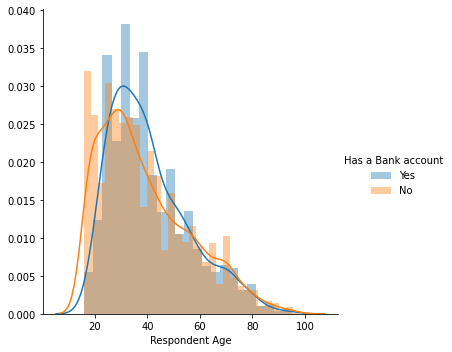

In [16]:
# Distribution Plots

# 1. Looking for age group with the most bank accounts.

sns.FacetGrid(Financial_data, hue = "Has a Bank account", 
              height = 5).map(sns.distplot,"Respondent Age").add_legend()

From the graph above, we can observe that people with the age 30 to 40 are the ones with the most bank accounts.

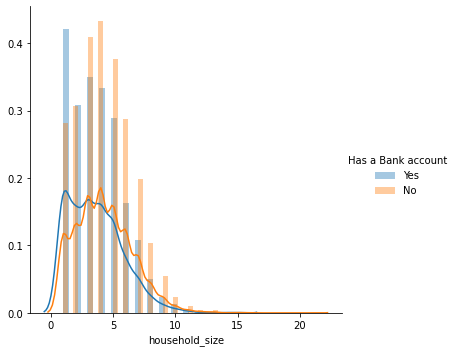

In [17]:
# 2. Looking for household size with the most bank accounts.

sns.FacetGrid(Financial_data, hue = "Has a Bank account", 
              height = 5).map(sns.distplot,"household_size").add_legend()

From the graph above, we can observe that households with less than 3 people are the ones with the most people with bank accounts.

# Bivariate Analysis

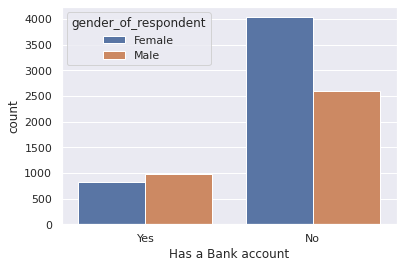

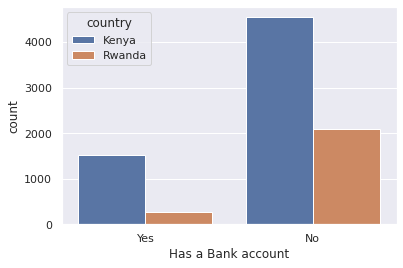

In [18]:
# I wish to know the which gender has the most number of bank accounts in different countries, 
#     categorical variables, “gender_of_respondent” and "country".

# I also wish to know the which country has the most number of bank accounts as compared to those with the least, 
#     categorical variables, “Has a Bank account” and "country".

%matplotlib inline

sns.set(style="darkgrid")
ax = sns.countplot(x='Has a Bank account', hue= "gender_of_respondent", data=Financial_data)
plt.show()

sns.set(style="darkgrid")
ax = sns.countplot(x='Has a Bank account', hue= "country", data=Financial_data)
plt.show()


From the graphs above, we can observe the following from our data:

1. In the given countries, Female gender lead in total number of people who do not have bank accounts, while male gender has slightly higher number of open bank accounts as compared to females.
2. Kenya leads with the highest number of people who have bank accounts while Rwanda has the most number of people without bank accounts.


I want to identify what effects Level of Education has on individuals and whether this can project those people who are most likely to have or use a bank account. 
Also, whether this can help provide an indication of the state of financial inclusion in the selected countries.

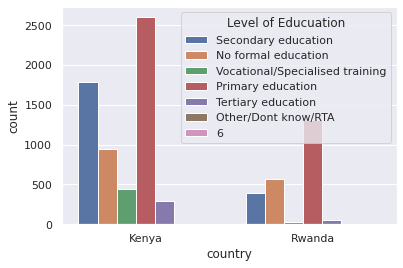

In [19]:
#  I want to corelate individual countries to Levels of education
sns.set(style="darkgrid")
ax = sns.countplot(x='country', hue= "Level of Educuation", data=Financial_data)
plt.show()

From the graph above, we can observe the following from our data:
1. Rwanda has the highest number of people with the lowest levels of education, recording hishest number of people with no formal education and highest number of of people who have studied up to primary level education.
2. Kenya had the highest number of people with high levels of education collectively.

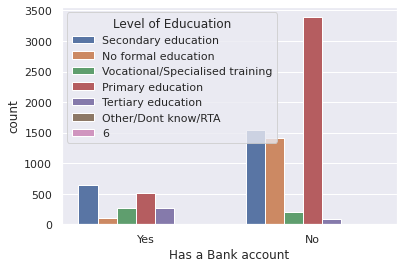

In [20]:
# How do the various Levels of Education corelate with people who have bank accounts?
sns.set(style="darkgrid")
ax = sns.countplot(x='Has a Bank account', hue= "Level of Educuation", data=Financial_data)
plt.show()

From the graph above, we can observe the following from our data:
1. People who only have Primary Education are majorly those who don't have bank accounts.
2. Levels of education do not necesarrily influence people into opening bank accounts since even despite a high number of people having higher levels of education, a majority of them still dont have bank accounts. 

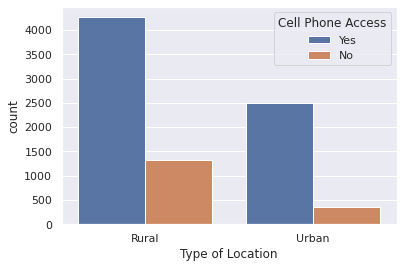

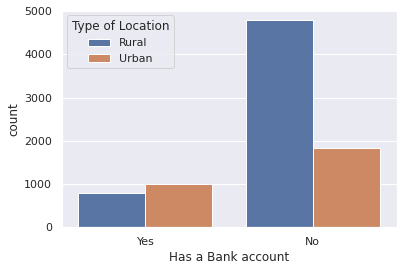

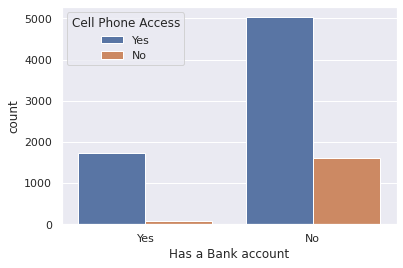

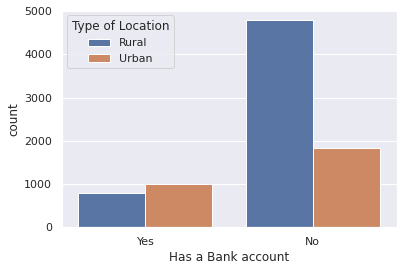

In [24]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Type of Location', hue= "Cell Phone Access", data=Financial_data)
plt.show()

sns.set(style="darkgrid")
ax = sns.countplot(x='Has a Bank account', hue=  "Type of Location", data=Financial_data)
plt.show()

sns.set(style="darkgrid")
ax = sns.countplot(x='Has a Bank account', hue= "Cell Phone Access", data=Financial_data)
plt.show()

ax = sns.countplot(x='Has a Bank account', hue= "Type of Location", data=Financial_data)
plt.show()

From the graphs above, we can observe the following from our data:
1. There are more people in rural areas who have access to cell phones as compared to those who are from urban areas.
2. There are more people who live in rural areas who do not have bank accounts.
3. Majority of the people with cell phone access do not have bank accounts.
4. A majority of the people in both urban and rural areas do not have bank accounts, and for those who have bank accounts in both ubran and rural areas, there isn't a big margin between the two.

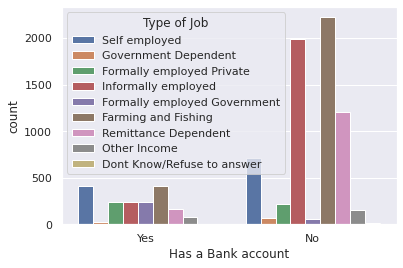

In [25]:
ax = sns.countplot(x='Has a Bank account', hue= "Type of Job", data=Financial_data)
plt.show()

From the graph above, we can observe the following from our data:
1. The set of people who are self employed and those who work in the farming and fishing industries are the majority of the people who have bank accounts.  
2. The majority of the set of people who work specifically in the farming and fishing industries are the majority of the people who don't have bank accounts, followed by those who are informally employed.
3. Government Dependent people do not show interest in opening bank accounts

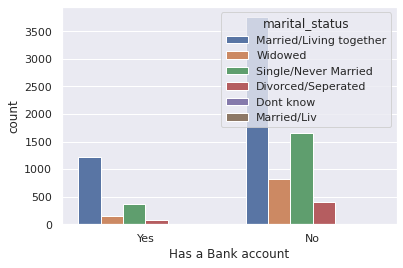

In [26]:
ax = sns.countplot(x='Has a Bank account', hue= "marital_status", data=Financial_data)
plt.show()

From the graph above, we can observe the following from our data:
1. Single/Never Married people majorly do not show interest in opening bank accounts.
2. Married/People Living together are the class of people who mostly open bank accounts.

# Multivariate Analysis

<Figure size 720x480 with 0 Axes>

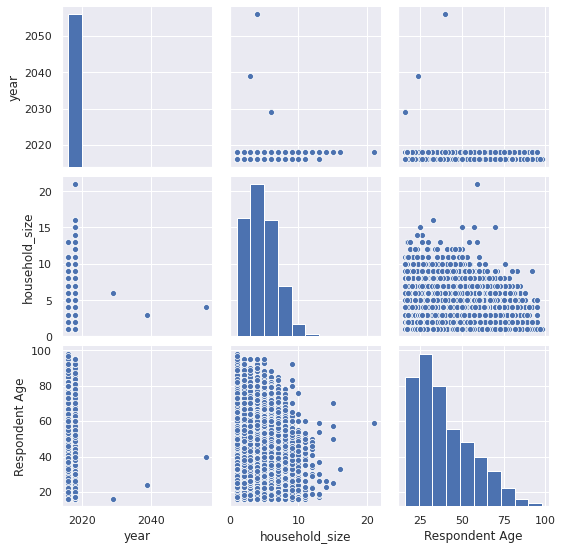

In [47]:
#pairplot

plt.figure(dpi=120)
sns.pairplot(Financial_data)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have var

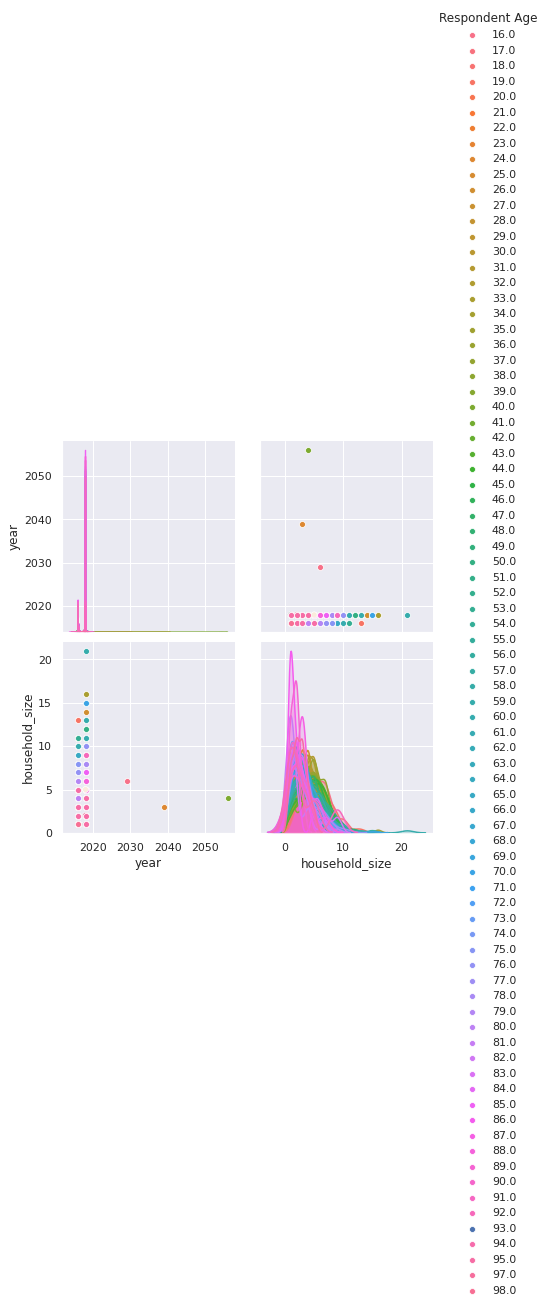

In [46]:
sns.pairplot(Financial_data, hue= "Respondent Age", size=3)
plt.show()

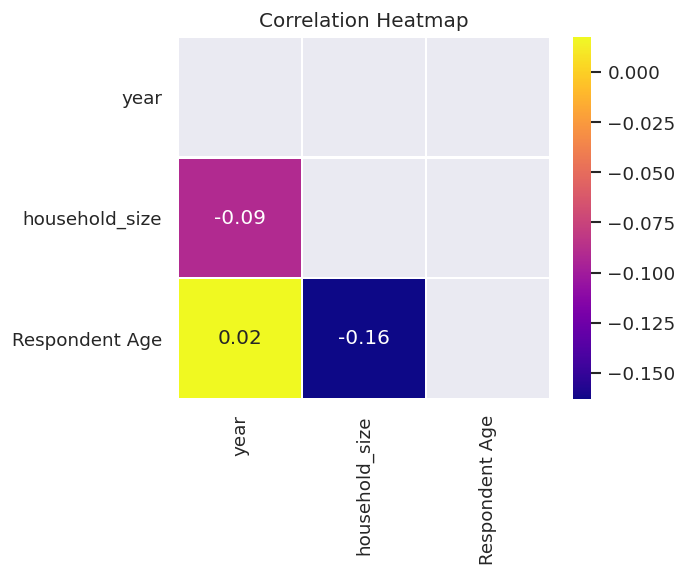

In [48]:
# Correlation
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(Financial_data.corr(),dtype = bool))
sns.heatmap(Financial_data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()